In [1]:
from pymongo import MongoClient
from io import BytesIO
from PIL import Image
from gridfs import GridFSBucket
import urllib.request

In [2]:
db = MongoClient().python_test
db

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'python_test')

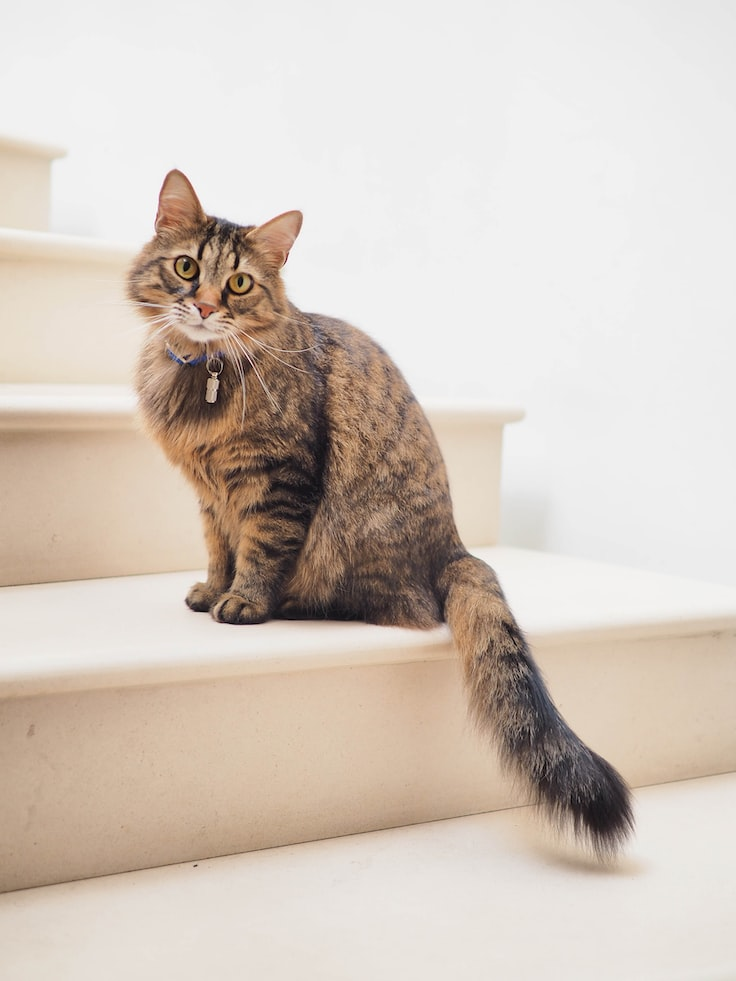

In [4]:
url = "https://images.unsplash.com/photo-1495360010541-f48722b34f7d?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=736&q=80"
data = urllib.request.urlopen(url).read()
Image.open(BytesIO(data))

In [6]:
# MongoDB로 파일을 업로드할 객체 생성
bucket = GridFSBucket(db)
bucket

In [7]:
grid_in = bucket.open_upload_stream(
    'result.jpg', metadata={'contentType': 'image/jpg'})
grid_in

In [8]:
grid_in.write(data)
grid_in.close()

In [10]:
image_list = list(db.fs.files.find())
image_list

[{'_id': ObjectId('63608c90ffed5a7dc9010298'),
  'filename': 'test.txt',
  'chunkSize': 261120,
  'length': 45,
  'uploadDate': datetime.datetime(2022, 11, 1, 3, 3, 44, 649000)},
 {'_id': ObjectId('6360939d0f2f376f7761e33d'),
  'filename': 'result.jpg',
  'metadata': {'contentType': 'image/jpg'},
  'chunkSize': 261120,
  'length': 72865,
  'uploadDate': datetime.datetime(2022, 11, 1, 3, 34, 20, 175000)}]

In [11]:
read_img = Image.open(BytesIO(data))
read_img.show()